In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [33]:
from sklearn import linear_model


In [34]:
from sklearn.linear_model import LogisticRegression

In [10]:
df=pd.read_csv('data_banknote_authentication.csv')

In [11]:
df.columns

Index(['Variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [5]:
from sklearn.svm import SVC

In [6]:
from sklearn.model_selection import train_test_split 

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
x=df[['Variance', 'skewness', 'curtosis', 'entropy']]

In [20]:
y=df["class"]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [22]:
x_train

,Variance,skewness,curtosis,entropy
1049,-3.95940,4.0289,-0.35845,-3.89570
172,-1.69520,1.0657,8.82940,0.94955
202,-0.78689,9.5663,-3.78670,-7.50340
595,3.18360,7.2321,-1.07130,-2.59090
837,-6.28150,6.6651,0.52581,-7.01070
...,...,...,...,...
580,4.70720,8.2957,-2.56050,-1.49050
163,2.40080,9.3593,-3.35650,-3.35260
607,5.74560,10.1808,-4.78570,-4.33660
414,1.98180,9.2621,-3.52100,-1.87200


In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [24]:
ss

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
ss.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
x_test_scaled=ss.transform(x_test)

In [27]:
x_train_scaled=ss.transform(x_train)

In [31]:
x_train_scaled

array([[-1.51716842,  0.3728759 , -0.40058998, -1.29110421],
       [-0.72782937, -0.13203068,  1.72651974,  1.02806139],
       [-0.41117689,  1.31640645, -1.19427554, -3.0179199 ],
       ...,
       [ 1.86616143,  1.42111254, -1.42555736, -1.50213978],
       [ 0.55403604,  1.2645731 , -1.13276245, -0.32246576],
       [-0.13576579, -0.99622656,  0.0981013 ,  1.01258673]])

In [44]:
model=LogisticRegression()

In [45]:
model.fit(x_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
model.score(x_test_scaled,y_test)

0.9737609329446064

In [47]:
y_pred=model.predict(x_test_scaled)

In [48]:
y_pred=model.predict(x_test_scaled)

In [49]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,

In [50]:
c0_p=x_test_scaled[y_pred==0]
c1_p=x_test_scaled[y_pred==1]
c0_a=x_test_scaled[y_test==0]
c1_a=x_test_scaled[y_test==1]

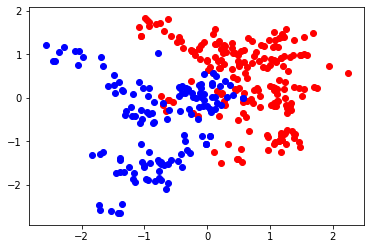

In [51]:
plt.scatter(c0_p[:,0],c0_p[:,1] ,c='red')
plt.scatter(c1_p[:,0],c1_p[:,1] ,c='blue')

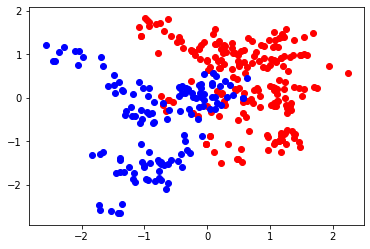

In [52]:
plt.scatter(c0_a[:,0],c0_a[:,1] ,c='red')
plt.scatter(c1_a[:,0],c1_a[:,1] ,c='blue')

In [65]:
model_SVC=SVC(kernel='rbf')

In [66]:
model_SVC.fit(x_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
model_SVC.score(x_test_scaled,y_test)

1.0

In [68]:
y_pred=model.predict(x_test_scaled)

In [69]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,

In [70]:
c0_p=x_test_scaled[y_pred==0]
c1_p=x_test_scaled[y_pred==1]
c0_a=x_test_scaled[y_test==0]
c1_a=x_test_scaled[y_test==1]

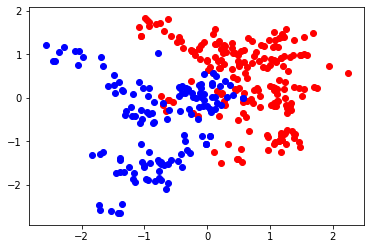

In [71]:
plt.scatter(c0_p[:,0],c0_p[:,1] ,c='red')
plt.scatter(c1_p[:,0],c1_p[:,1] ,c='blue')

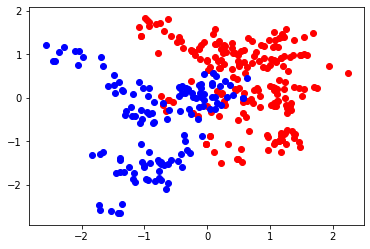

In [72]:
plt.scatter(c0_a[:,0],c0_a[:,1] ,c='red')
plt.scatter(c1_a[:,0],c1_a[:,1] ,c='blue')

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
model_knn=KNeighborsClassifier()

In [79]:
model_knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [81]:
model_knn.score(x_test_scaled,y_test)

0.9970845481049563

In [82]:
c0_p=x_test_scaled[y_pred==0]
c1_p=x_test_scaled[y_pred==1]
c0_a=x_test_scaled[y_test==0]
c1_a=x_test_scaled[y_test==1]

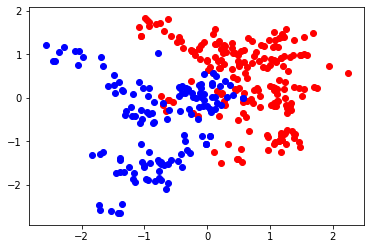

In [84]:
plt.scatter(c0_p[:,0],c0_p[:,1] ,c='red')
plt.scatter(c1_p[:,0],c1_p[:,1] ,c='blue')

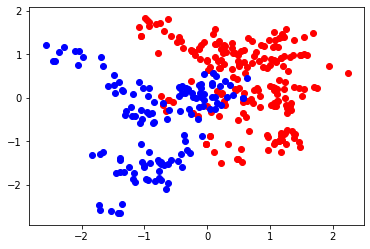

In [85]:
plt.scatter(c0_a[:,0],c0_a[:,1] ,c='red')
plt.scatter(c1_a[:,0],c1_a[:,1] ,c='blue')

   c0_p=x_test_scaled[y_pred==0]
c1_p=x_test_scaled[y_pred==1]
c0_a=x_test_scaled[y_test==0]
c1_a=x_test_scaled[y_test==1]